In [20]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [11]:
trainding_data=pd.read_csv('E:\DataScience\Data\GiveMeSomeCredit\cs-training.csv',engine='python',index_col=0)
testing_data=pd.read_csv('E:\DataScience\Data\GiveMeSomeCredit\cs-test.csv',engine='python',index_col=0)
Data_Dictionary=pd.read_excel('E:\DataScience\Data\GiveMeSomeCredit\Data Dictionary.xls')
sampleEntry=pd.read_csv('E:\DataScience\Data\GiveMeSomeCredit\sampleEntry.csv',engine='python')

# 1.首先观察数据格式

## 1.1 训练数据

In [10]:
trainding_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
trainding_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [24]:
len(trainding_data)

150000

### 标签分布

In [13]:
trainding_data.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### 各个特征的分布

#### RevolvingUtilizationOfUnsecuredLines

In [25]:
trainding_data.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

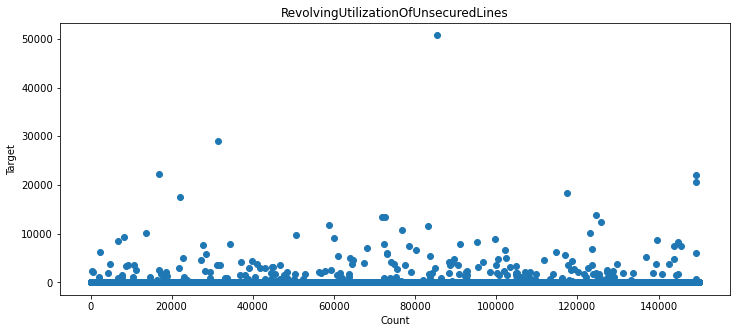

In [26]:
platix=np.arange(0,len(trainding_data.RevolvingUtilizationOfUnsecuredLines),1)
plt.figure(figsize=(12, 5))
plt.scatter(x=platix,y=trainding_data.RevolvingUtilizationOfUnsecuredLines)
plt.title('RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

有明显异常值，例如50000，此类数据后续可舍弃可替换值，具体待定

特征RevolvingUtilizationOfUnsecuredLines与目标没有线性关系，但是可以看出数值偏小的更容易逾期

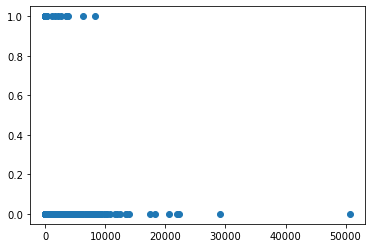

In [21]:
plt.scatter(x=trainding_data.RevolvingUtilizationOfUnsecuredLines,y=trainding_data.SeriousDlqin2yrs)

#### Age

In [27]:
trainding_data.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

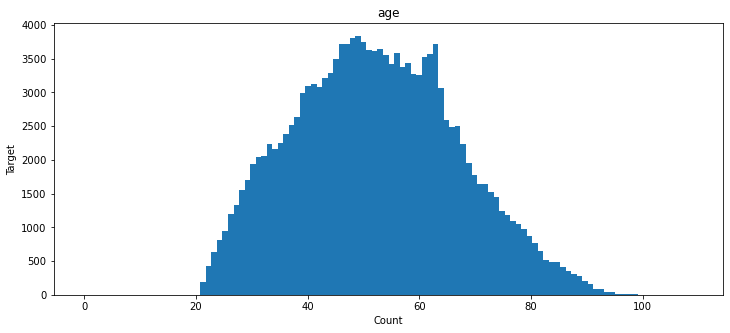

In [38]:
platix=np.arange(0,len(trainding_data.age),1)
plt.figure(figsize=(12, 5))
plt.hist(trainding_data.age.values, bins=110)
plt.title('age')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

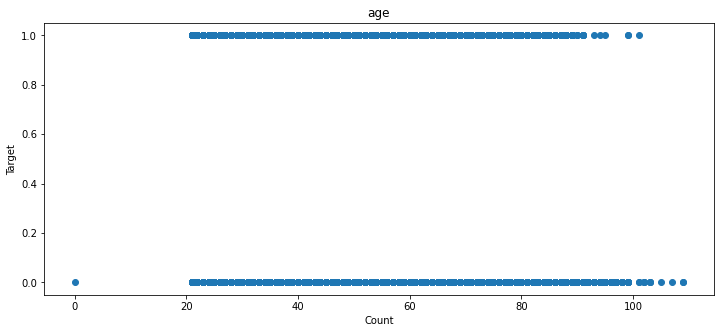

In [40]:
platix=np.arange(0,len(trainding_data.age),1)
plt.figure(figsize=(12, 5))
plt.scatter(x=trainding_data.age,y=trainding_data.SeriousDlqin2yrs)
plt.title('age')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

## 1.2 SampleEntry数据

In [14]:
sampleEntry.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [19]:
sampleEntry.count()

Id             101503
Probability    101503
dtype: int64

## 1.3 测试数据

In [15]:
testing_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [16]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

## 1.4 数据字典

In [18]:
Data_Dictionary

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
